In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from decimal import Decimal as D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from sklearn import preprocessing, cross_validation
from sklearn.manifold import TSNE
from pandas.tools.plotting import parallel_coordinates
from sklearn import metrics
from sklearn.metrics import pairwise_distances

/home/sushant/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# df = pd.read_csv('FRIENDSS07E01.mkv.embedding.txt', header = None, sep=" ")

# print(len(df.columns))

# colnames = ['timestamp', 'faceID']
# for i in range(0,len(df.columns)-2):
#     colnames.append(i)
# df.columns = colnames
# # print(df.head())

# Xdf = df.drop(['timestamp','faceID'], axis = 1)
# # print(Xdf.head())


In [5]:
df = pd.read_csv('final.csv', header = None, sep=",")
print (df.head())
Xdf=df

         0         1         2         3         4         5         6   \
0 -0.164152 -0.302162  0.211064  0.211151  0.419192  0.274603  0.124740   
1 -0.050472 -0.297365  0.181217  0.230241  0.445062  0.340195  0.122685   
2 -0.083627 -0.235964  0.176069  0.200003  0.454272  0.323873  0.152781   
3 -0.012543 -0.147556  0.094068  0.150409  0.467328  0.342738  0.209469   
4  0.088981 -0.136940  0.040995  0.039686  0.464015  0.410829  0.099991   

         7         8         9         10        11        12        13  \
0 -0.259454 -0.026886  0.175936  0.132312 -0.481270 -0.000935  0.149690   
1 -0.265239 -0.043326  0.157394  0.078177 -0.520071 -0.029987  0.061668   
2 -0.278317 -0.068040  0.146759  0.121547 -0.540901  0.020743  0.088158   
3 -0.324625 -0.059350  0.125135  0.148515 -0.589404  0.040652  0.075865   
4 -0.335265 -0.113572  0.171990  0.180895 -0.571695  0.018924 -0.010116   

         14        15  
0  0.378848 -0.108981  
1  0.328048 -0.091686  
2  0.327154 -0.074295  
3 

In [6]:
X = []
for i in range(0,len(Xdf.index)):
    X.append(np.array(Xdf.iloc[i]))
X = np.array(X)
print(X)
# X = preprocessing.scale(X) #comment this if preprocessing after fitting

[[-0.16415246 -0.30216151  0.21106423  0.21115108  0.41919219  0.27460289
   0.12473988 -0.25945356 -0.0268862   0.17593631  0.13231236 -0.48127043
  -0.00093474  0.14969005  0.37884751 -0.10898085]
 [-0.05047202 -0.29736489  0.18121682  0.23024112  0.44506207  0.34019533
   0.12268537 -0.26523867 -0.04332632  0.15739378  0.07817675 -0.52007127
  -0.02998671  0.06166833  0.32804811 -0.09168641]
 [-0.08362732 -0.23596415  0.17606914  0.20000345  0.45427197  0.32387298
   0.15278143 -0.27831712 -0.06803996  0.14675893  0.12154726 -0.54090071
   0.02074344  0.08815792  0.32715383 -0.07429463]
 [-0.01254274 -0.14755623  0.09406831  0.15040907  0.46732792  0.34273836
   0.20946886 -0.32462472 -0.05935034  0.12513533  0.148515   -0.58940428
   0.04065195  0.07586531  0.25288221  0.0384935 ]
 [ 0.08898091 -0.13693984  0.04099501  0.03968573  0.46401504  0.41082937
   0.09999053 -0.33526546 -0.1135723   0.17198983  0.18089546 -0.57169515
   0.01892437 -0.01011587  0.20811938  0.13330725]
 [ 0.

In [7]:
bandwidth = estimate_bandwidth(X, quantile=0.5)
clf = MeanShift(bandwidth = bandwidth)
clf.fit(X)
L = clf.labels_
score = metrics.silhouette_score(X, L, metric='euclidean')
print(score)
labels = clf.labels_
print(labels)
centers = clf.cluster_centers_
c = clf.cluster_centers_

0.703031609763616
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
model = TSNE(n_components=2, n_iter = 1000 , learning_rate =200 , angle = 0.5 )
X = np.append(X,centers,axis = 0) #
c = len(set(labels))
clabels = np.arange(0,c,1)
# print(len(set(labels)))
# for i in range(0,len(set(labels))):
#     np.append(clabels,i)
#     print(i)
print(clabels)
labels = np.append(labels,clabels)#
X_2d = pd.DataFrame(model.fit_transform(X))
cent_2d =pd.DataFrame(model.fit_transform(centers))
X_2d['labels']=labels.tolist()

[0 1]


No handles with labels found to put in legend.


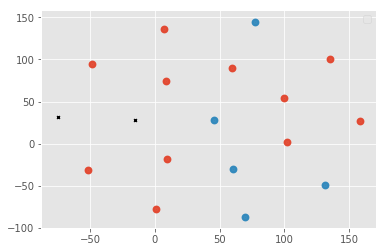

In [9]:
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, projection='3d')
colors = 100*['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8']

for label in set(labels):
#     print label
    color = colors[label]
#     print (color)
    for i in range(0,(len(X_2d.index)-c)):
        if (X_2d.iloc[i][2] == label):
            plt.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1], marker="o", color=color, s=8, linewidths=5)
#             ax1.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1],X_2d.iloc[i][2], marker="o", color=color, s=10, linewidths=5)
    for i in range((len(X_2d.index)-c), len(X_2d.index)):
        if (X_2d.iloc[i][2] == label):
            plt.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1], marker="x", color='k', s=8, linewidths=5)
plt.legend()
plt.show()

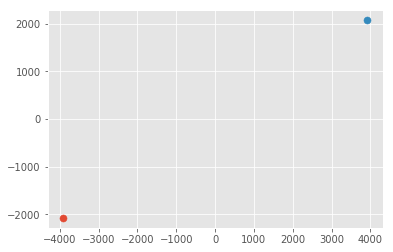

In [10]:
for i in cent_2d.index:
    plt.scatter(cent_2d.iloc[i][0],cent_2d.iloc[i][1],s = 50)
    
plt.show()